## CS-471: Machine Learning
### **Submitted By**:
#### **Name**: Ayesh Ahmad
#### **CMS**: 365966
#### **Class**: BESE-12A
---
## Lab 8
#### Train a Gaussian Naïve Bayes classifier on the MNIST digits dataset. Compare your results with classifiers including Decision Trees, Support Vector Classifier and Logistic Regression Classifier. Identify which technique performs best on the digits dataset and explain why the performance of this technique is better than all the others.

##### Imports
---

In [2]:
import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

##### Data Ingestion, Analysis, and Preprocessing
---

Load the downscaled MNIST dataset

In [3]:
mnist = fetch_openml('mnist_784')

Data analysis and visualization

In [4]:
X = mnist.data
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = mnist.target
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

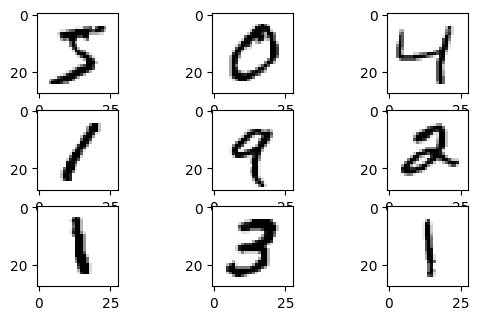

In [6]:
image = X.to_numpy().reshape(70000, 28, 28)

for i in range(9):
    plt.subplot(431+i)
    plt.imshow(image[i], cmap=plt.cm.gray_r, interpolation='nearest')

Creating train/test splits

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training:\t", X_train.shape)
print("\t\t", y_train.shape)
print("\nTesting:\t", X_test.shape)
print("\t\t", y_test.shape)

Training:	 (56000, 784)
		 (56000,)

Testing:	 (14000, 784)
		 (14000,)


##### Classifier Evaluations
---

Model Initializations

In [12]:
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression(max_iter=10000, random_state=42)

Train and Evaluate Gaussian Naïve Bayes

In [13]:
# Train Gaussian Naïve Bayes
start_time_train_gnb = time.time()
gnb.fit(X_train, y_train)
end_time_train_gnb = time.time()
train_time_gnb = end_time_train_gnb - start_time_train_gnb

# Evaluate Gaussian Naïve Bayes
start_time_test_gnb = time.time()
y_pred_gnb = gnb.predict(X_test)
end_time_test_gnb = time.time()
test_time_gnb = end_time_test_gnb - start_time_test_gnb

# Generate classification report for Gaussian Naïve Bayes
classification_rep_gnb = classification_report(y_test, y_pred_gnb)

Train and Evaluate Decision Tree

In [14]:
# Train Decision Tree
start_time_train_dt = time.time()
dt.fit(X_train, y_train)
end_time_train_dt = time.time()
train_time_dt = end_time_train_dt - start_time_train_dt

# Evaluate Decision Tree
start_time_test_dt = time.time()
y_pred_dt = dt.predict(X_test)
end_time_test_dt = time.time()
test_time_dt = end_time_test_dt - start_time_test_dt

# Generate classification report for Decision Tree
classification_rep_dt = classification_report(y_test, y_pred_dt)

Train and Evaluate Support Vector Machine

In [15]:
# Train Support Vector Machine
start_time_train_svc = time.time()
svc.fit(X_train, y_train)
end_time_train_svc = time.time()
train_time_svc = end_time_train_svc - start_time_train_svc

# Evaluate Support Vector Machine
start_time_test_svc = time.time()
y_pred_svc = svc.predict(X_test)
end_time_test_svc = time.time()
test_time_svc = end_time_test_svc - start_time_test_svc

# Generate classification report for Support Vector Machine
classification_rep_svc = classification_report(y_test, y_pred_svc)

Train and Evaluate Logistic Regression

In [16]:
# Train Logistic Regression
start_time_train_lr = time.time()
lr.fit(X_train, y_train)
end_time_train_lr = time.time()
train_time_lr = end_time_train_lr - start_time_train_lr

# Evaluate Logistic Regression
start_time_test_lr = time.time()
y_pred_lr = lr.predict(X_test)
end_time_test_lr = time.time()
test_time_lr = end_time_test_lr - start_time_test_lr

# Generate classification report for Logistic Regression
classification_rep_lr = classification_report(y_test, y_pred_lr)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Result Comparison

In [20]:
print("Model: Gaussian Naïve Bayes")
print(f"Training Time: {train_time_gnb:.4f} seconds")
print(f"Testing Time: {test_time_gnb:.4f} seconds")
print("Classification Report:")
print(classification_rep_gnb)
print("-" * 50)

print("Model: Decision Tree")
print(f"Training Time: {train_time_dt:.4f} seconds")
print(f"Testing Time: {test_time_dt:.4f} seconds")
print("Classification Report:")
print(classification_rep_dt)
print("-" * 50)

print("Model: Support Vector Machine")
print(f"Training Time: {train_time_svc:.4f} seconds")
print(f"Testing Time: {test_time_svc:.4f} seconds")
print("Classification Report:")
print(classification_rep_svc)
print("-" * 50)

print("Model: Logistic Regression")
print(f"Training Time: {train_time_lr:.4f} seconds")
print(f"Testing Time: {test_time_lr:.4f} seconds")
print("Classification Report:")
print(classification_rep_lr)
print("-" * 50)

Model: Gaussian Naïve Bayes
Training Time: 1.0631 seconds
Testing Time: 0.7911 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.78      1343
           1       0.81      0.95      0.88      1600
           2       0.85      0.30      0.44      1380
           3       0.74      0.32      0.45      1433
           4       0.83      0.13      0.23      1295
           5       0.61      0.04      0.08      1273
           6       0.64      0.94      0.76      1396
           7       0.91      0.28      0.42      1503
           8       0.29      0.60      0.39      1357
           9       0.37      0.94      0.53      1420

    accuracy                           0.55     14000
   macro avg       0.67      0.54      0.50     14000
weighted avg       0.68      0.55      0.51     14000

--------------------------------------------------
Model: Decision Tree
Training Time: 15.1024 seconds
Testing Time: 0.0275 seconds

##### Results & Conclusion
---

| Model | Train Time (s) | Test Time (s) | Accuracy | Precision | Recall | F1-Score |
|-|-|-|-|-|-|-|
| Gaussian Naïve Bayes | 1.0631 | 0.7911 | 0.55 | 0.68 | 0.55 | 0.51 |
| Decision Tree | 15.1024 | 0.0275 | 0.87 | 0.87 | 0.87 | 0.87 |
| Support Vector Machine | 166.2372 | 330.3363 | 0.98 | 0.98 | 0.98 | 0.98 |
| Logistic Regression | 1001.7148  | 0.0473  | 0.92 | 0.92 | 0.92 | 0.92 |

- Gaussian Naïve Bayes is the fastest but has the lowest accuracy, likely due to its assumption of feature independence, which doesn't hold well for image data like MNIST.
- Decision Tree has moderate training time, very low testing time, and good performance, benefiting from its ability to capture complex relationships in the data.
- Support Vector Machine (SVM) has the longest training and testing times but achieves the highest accuracy, precision, recall, and F1-score, making it the best performer overall.
- Logistic Regression has a long training time but short testing time, similar to the Decision Tree, and performs well due to its ability to handle linearly separable classes.

SVM's performance superiority is due to its ability to find optimal hyperplanes in high-dimensional spaces, making it effective for complex tasks like digit recognition.